# <div style="text-align: center"> Applied Machine Learning </div>

###### <div style="text-align: right"> Udit Maniyar<br><br> ES16BTECH11024 </div>

## Theory

### 1) Logistic Regression

###### a) Plot the sigmoid function or increasing weight w ∈ {1, 5, 100}. Use these plots to argue why a solution with large weights can cause logistic regression to overfit.

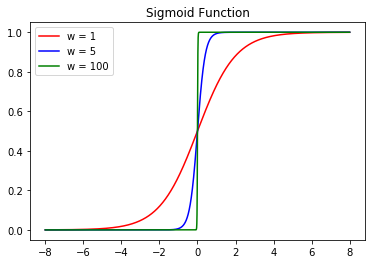

In [2]:
from matplotlib import pylab as plt
import numpy as np
def sigmoid(w,x):
    return (1 / (1 + np.exp(-w*x)))
x = np.linspace(-8,8,10000)
plt.plot(x, sigmoid(1,x), 'r', label='w = 1')
plt.plot(x, sigmoid(5,x), 'b', label='w = 5')
plt.plot(x, sigmoid(100,x), 'g', label='w = 100')
plt.legend(loc='best')
plt.title('Sigmoid Function')
plt.show()

As we can see from the above figure the sigmoid function with w = 100 is much steeper i.e with small changes in the x the value of probality changes drastically  and also the probability achieved on most of the input is always 1 or 0 i.e it is able to confirm the presence of one class with very high probability. Which happens when the solution overfits the model. When w = 1 small changes in x does not change the value of probability drastically because the graph is less steep and hence does not overfit the model

###### b) To prevent overfitting, we want the weights to be small. To achieve this, instead of maximum likelihood estimation MLE for logistic regression we can consider maximum a posterior (MAP) estimation. Assuming a standard Gaussian prior N (0, I) for the weight vector (I = Identity matrix), derive the gradient ascent update rules for the weights.

<img src="images/1_b.jpg" style="width:900px;height:900px;">

###### c) Extending Logistic Regression to Multi-Class Regression. 

<img src="images/1_c.jpg" style="width:900px;height:900px;">

###### d) Draw a set of training data with three labels and the decision boundary resulting from a multi-class logistic regression.

<img src="images/1_d.jpg" style="width:900px;height:400px;">

## 2) Kernel Regression and Variants

###### a) In kernel regression using the Gaussian kernel , given an input x, what is the estimated output ŷ? Is this kernel regression a linear smoother?

<img src="images/2_a.jpg" style="width:900px;height:500px;">

###### b) Suppose we fit a linear regression model, but instead of sum of residual squares , we minimized the sum of absolute values of residuals. Prove that this is not a linear smoother (give a counter-example). <br> c) Is Regressogram a linear Smoother

<img src="images/2_b-c.jpg" style="width:900px;height:900px;">

## Programming Questions

In [2]:
#Import All required Things
import pandas as pd
import numpy as np
import csv
import math
import timeit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None  # default='warn'

### Question 3. Linear Regression

##### a) Conversion of attribute that encodes-female, infant and male to binary

In [8]:
def get_data():
    col0 = np.genfromtxt ('linregdata',usecols=0, delimiter=",",dtype = str)

    col1to8 = np.genfromtxt ('linregdata',usecols = range(1,9),delimiter=",")

    binaryrep = []
    for i in col0:
        if i=="F":
            binaryrep.append([1.0,0.0,0.0])
        elif i=="I":
            binaryrep.append([0.0,1.0,0.0])
        elif i=="M":
            binaryrep.append([0.0,0.0,1.0])

    binaryrep = np.array(binaryrep)
    data = np.hstack((binaryrep,col1to8))
    
    return data[:,:-1],data[:,-1]

In [9]:
X,Y = get_data()
print(X.shape)

(4177, 10)


###### b) Standardize the independent variables 

In [10]:
def standardize(train,test):
    #Standardize
    for i in range(train.shape[1]-1):
        test[:,i] -= np.mean(train[:,i])
        test[:,i] /= np.std(train[:,i])
        
        
        train[:,i] -= np.mean(train[:,i])
        train[:,i] /= np.std(train[:,i])

        
    #Check if Correct or not
    for i in range(train.shape[1]-1):
        assert np.mean(train[:,i])< 0.000001, "Mean not Zero"
        
        assert abs(np.std(train[:,i])-1) <0.000001, "Standard Deviation not 1"
    
    return train,test

###### c) Implementation of Linear Ridge Regression

In [11]:
'''mylinridgereg(X, Y, lamda = 0):
Calculates the linear least squares solution with the ridge regression penalty parameter λ(Lamda)
and returns the regression weights
'''
def mylinridgereg(X, Y, lamda = 0):

    bias_attribute = np.full((X.shape[0],1),1)
   
    X = np.hstack((bias_attribute,X))
    X_T =X.T
    
    inv = np.linalg.inv( (X_T @ X) + ( lamda * np.identity(X.shape[1]) ) )
    
    weights = inv @ X_T @ Y
    
    return weights
    
'''
mylinridgeregeval(X, weights):
Returns a prediction of the target variable given the input variables and regression weights
'''
def mylinridgeregeval(X, weights):
    
    bias_attribute = np.full((X.shape[0],1),1)
   
    X = np.hstack((bias_attribute,X))
    
    Y_Prediction = X @ weights
    
    return Y_Prediction
    
    
'''
meansquarederr(T, Tdash) computes the mean squared error between the predicted and actual target values.
'''
def meansquarederr(T, Tdash):
    error = 0
    for i in range(len(T)):
        error += (T[i]-Tdash[i])**2
    
    error = error/len(T)
    
    return error
    

###### d) Partition the data set in Training and Test Set

In [12]:
def splitter(X,Y,ratio = 0.2):
    
    ratio = 1-ratio
    
    Y = np.resize(Y,(len(Y),1))
    
    data = np.hstack((X,Y))
    
    data = np.random.permutation(data)
    
    train_len = round(ratio*len(data))

    train = data[ :train_len, :]
    
    test = data[train_len:, : ]
    return train,test

In [13]:
'''
Run Model First fits the training data and 
then predicts the output on both test and training data
'''
def run_model(x_Train, y_Train,x_Test,y_Test, lamb = 0):
    
    weights = mylinridgereg(x_Train,y_Train,lamda = lamb)

    
    test_Prediction = mylinridgeregeval(x_Test,weights)
    test_error = meansquarederr(y_Test, test_Prediction)
    
    
    train_Prediction = mylinridgeregeval(x_Train,weights)
    train_error =  meansquarederr(y_Train, train_Prediction)
    
    return weights,test_error,train_error

In [14]:
X,Y = get_data()
train,test = splitter(X,Y)
train,test = standardize(train,test)

x_Train = train[:,:-1]
y_Train = train[:,-1]
x_Test = test[:,:-1]
y_Test = test[:,-1]
print(x_Train.shape)
print(x_Test.shape)

(3342, 10)
(835, 10)


In [15]:
weights,test_error,train_error = run_model(x_Train, y_Train,x_Test,y_Test,lamb = 0)
print("-----------------------------------")
print("Lambda = 0")
print("Test Error :", test_error,sep = "")
print("Train Error :", train_error,sep = "")
print("-----------------------------------")

weights,test_error,train_error = run_model(x_Train, y_Train,x_Test,y_Test,lamb = 100)

print("Lambda = 100")
print("Test Error :", test_error,sep = "")
print("Train Error :", train_error,sep = "")
print("-----------------------------------")

-----------------------------------
Lambda = 0
Test Error :5.344425483865364
Train Error :4.7337453656392405
-----------------------------------
Lambda = 100
Test Error :5.777885698722163
Train Error :4.978575317465919
-----------------------------------


###### e) Identify the λ with the best performance and examine the weights of the ridge regression model. Which are the most significant attributes?

In [16]:
def find_bestlambda(x_Train,y_Train,x_Test,y_Test):
    
    x_Train = train[:,:-1]
    y_Train = train[:,-1]
    x_Test = test[:,:-1]
    y_Test = test[:,-1]
    
    lamda = range(0,500,2)

    testerr= []
    trainerr = []
    for i in lamda:
        weights,test_error,train_error = run_model(x_Train, y_Train,x_Test,y_Test,lamb = i)
        testerr.append(test_error)
        trainerr.append(train_error)
        
    plt.plot(lamda,testerr,label = "Test Error")
    plt.plot(lamda,trainerr,label = "Train Error")
    
    plt.xlabel('Lambda') 
    # naming the y axis 
    plt.ylabel('Error') 

    plt.legend()
    plt.show()

    best_test = 2*testerr.index(min(testerr))
    best_train = 2*trainerr.index(min(trainerr))

    print("Minimum Test Error ",min(testerr),"Obtained at lambda = ", best_test)
    print("Minimum Train Error ",min(trainerr),"Obtained at lambda = ", best_train)

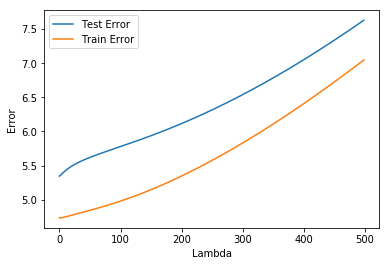

Minimum Test Error  5.344425483865364 Obtained at lambda =  0
Minimum Train Error  4.732005168464769 Obtained at lambda =  2


In [17]:
find_bestlambda(x_Train,y_Train,x_Test,y_Test)

In [18]:
weights,test_error,train_error = run_model(x_Train, y_Train,x_Test,y_Test,lamb = 0)
# print("Weights :")
# print(weights)
print("-----------------------------------")
print("Test Error :", test_error,sep = "")
print("Train Error :", train_error,sep = "")
print("-----------------------------------")


weights = abs(weights)
new_weights = sorted(weights)

weights = list(weights)
print("--------------------------")
print("Sorted Order of Absolute Value of Weights: ")
for i in new_weights:
    print("Attribute No " , weights.index(i),i,sep=" ")

-----------------------------------
Test Error :5.344425483865364
Train Error :4.7337453656392405
-----------------------------------
--------------------------
Sorted Order of Absolute Value of Weights: 
Attribute No  3 0.15912523989563168
Attribute No  4 0.18787327689371874
Attribute No  1 0.19027700064243058
Attribute No  2 0.6114249571935482
Attribute No  6 0.8009620293683484
Attribute No  5 0.9946314411171084
Attribute No  9 1.1420920694944499
Attribute No  10 1.3168155579240595
Attribute No  7 3.936840641358711
Attribute No  8 4.14731576942482
Attribute No  0 9.952124476361456


#### Columns with low weights are least significant because it contributes very less to y
###### In this case feature 3 and 2 are least significant ones.

In [19]:
def removecolandrun(x_Train, y_Train,x_Test,y_Test, col1,col2,col3=-1):
    if col3==-1:
        x_Test =  np.delete(x_Test,[col1-1,col2-1],axis=1)
        x_Train = np.delete(x_Train,[col1-1,col2-1],axis=1)
    
    else:
        x_Test =  np.delete(x_Test,[col1-1,col2-1,col3-1],axis=1)
        x_Train = np.delete(x_Train,[col1-1,col2-1,col3-1],axis=1)
        
    
    weights,test_error,train_error = run_model(x_Train, y_Train,x_Test,y_Test,lamb = 0)
    print("-----------------------------------")
    print("Test Error :", test_error,sep = "")
    print("Train Error :", train_error,sep = "")
    print("-----------------------------------")

In [20]:
leastwt1 = weights.index(new_weights[0])
leastwt2 = weights.index(new_weights[1])
leastwt3 = weights.index(new_weights[2])
print("Removing Column: ",leastwt1-1,leastwt2-1,sep = " ")
removecolandrun(x_Train, y_Train,x_Test,y_Test,leastwt1,leastwt2)
print("Removing Column: ",leastwt1-1,leastwt2-1,leastwt3-1,sep = " ")
removecolandrun(x_Train, y_Train,x_Test,y_Test,leastwt1,leastwt2,leastwt3)

Removing Column:  2 3
-----------------------------------
Test Error :5.3332646321278565
Train Error :4.731766107484924
-----------------------------------
Removing Column:  2 3 0
-----------------------------------
Test Error :5.334298980106073
Train Error :4.731779491033489
-----------------------------------


##### Removal of Columns with low weights Decreases the training and test rmse.
Actually Few of the columns may not be that important and hence removing then the model can efficiently focus on only few of the Features and train better.

BUt sometimes after removal of columns the error increased. This may be because in the ridge regression we wantedly reduce the weights of the attributes by choosing lamda. May be the attributes are usefull but their weights got reduced only due to the regularisation used.

###### f) Does the effect of λ on error change for different partitions of the data into training and test sets
###### g) Plot the minimum average mean squared testing error versus the partition fraction and also plot the λ value that produced the minimum average mean squared testing error versus the partition fraction

In [21]:
def func(X,Y):
    ratios = [0.2,0.4,0.5,0.7,0.8]
    minerr = []
    minlam = []

    
    for i in ratios:
        
        testerr = np.zeros(50)
        trainerr = np.zeros(50)

        for j in range(25):

            train,test = splitter(X,Y,i)
            train,test = standardize(train,test)
            
            x_Train = train[:,:-1]
            y_Train = train[:,-1]
            x_Test = test[:,:-1]
            y_Test = test[:,-1]
            
            for lam in range(0,50,1):
                weights,test_error,train_error = run_model(x_Train, y_Train,x_Test,y_Test,lamb = lam)
                testerr[lam] += test_error
                trainerr[lam] += train_error
                        
        testerr = testerr/25
        trainerr = trainerr/25
        
        minerr.append(testerr[np.argmin(testerr)])
        minlam.append(np.argmin(testerr))
        
        print("Lowest Avg Test Error at lamda : ", np.argmin(testerr),"Error : ",testerr[np.argmin(testerr)])
        print("Lowest Avg Training Error at lamda : ",np.argmin(trainerr),"Error : ",testerr[np.argmin(trainerr)])
        
        plt.title('Ratio :'+ str(i))
        plt.plot(range(0,50,1),testerr,label = "Test Error")
        plt.plot(range(0,50,1),trainerr,label = "Train Error")
        plt.legend(loc='best')
        plt.show()
        
    plt.title("Minimum average mean squared testing error versus the partition fraction")
    plt.xlabel("Partition Fraction")
    plt.ylabel("Minimum Acg Mean Squared Test Err")
    plt.plot(ratios,minerr)
    plt.show()
    
    plt.title("λ value that produced the minimum average mean squared testing error versus the partition fraction")
    plt.xlabel("Partition Fraction")
    plt.ylabel("λ value that produced min Avg Mean Sq Test Err")
    plt.plot(ratios,minlam)
    plt.show()
    

Lowest Avg Test Error at lamda :  4 Error :  4.936707214183074
Lowest Avg Training Error at lamda :  1 Error :  4.939271677605216


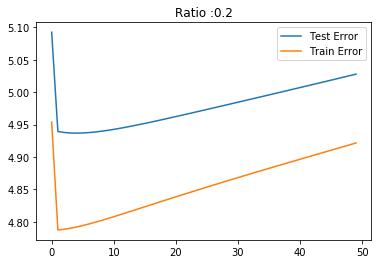

Lowest Avg Test Error at lamda :  1 Error :  4.935215646963283
Lowest Avg Training Error at lamda :  1 Error :  4.935215646963283


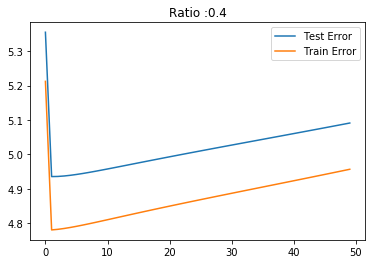

Lowest Avg Test Error at lamda :  1 Error :  4.991690219988899
Lowest Avg Training Error at lamda :  1 Error :  4.991690219988899


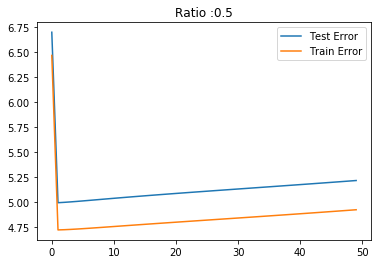

Lowest Avg Test Error at lamda :  1 Error :  4.938635190369296
Lowest Avg Training Error at lamda :  1 Error :  4.938635190369296


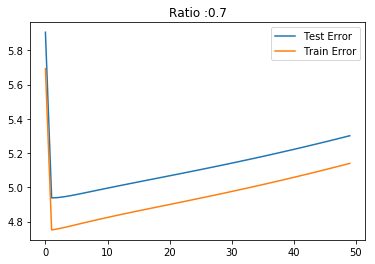

Lowest Avg Test Error at lamda :  1 Error :  4.983250566272861
Lowest Avg Training Error at lamda :  1 Error :  4.983250566272861


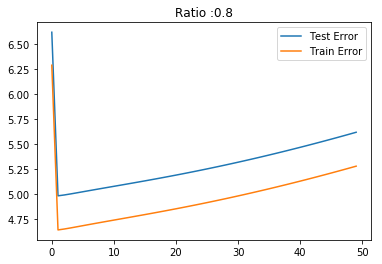

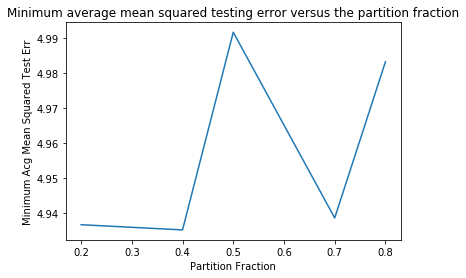

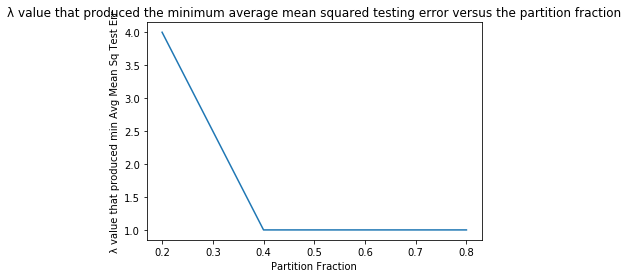

In [25]:
X,Y = get_data()
func(X,Y)

- The behaviour of Lambda for different partition fraction is the same.i.e first the Rmse Decreases then it increases.
- This may be accredited to the fact that first when lamda = 0 the model tries to overfit,but when lamda increases the generalisation error decreases till some minimum point but after that the weights become smaller and smaller and the dividing line/plane starts coming closer to the origin and hence cannot predict well and the error begins to increase

##### The minimum RMSE error was found at partition fraction = 0.2 and lamda = 4

###### h) How good is your model?

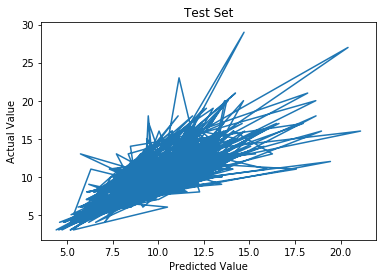

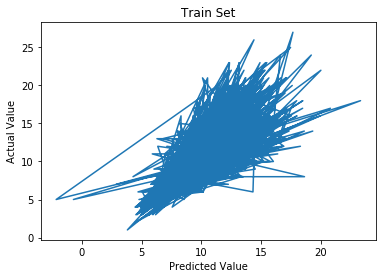

In [26]:
X,Y = get_data()
train,test = splitter(X,Y,0.2)
train,test = standardize(train,test)

x_Train = train[:,:-1]
y_Train = train[:,-1]
x_Test = test[:,:-1]
y_Test = test[:,-1]

weights = mylinridgereg(x_Train,y_Train,lamda = 4)

test_Prediction = mylinridgeregeval(x_Test,weights)

plt.title("Test Set")
plt.plot(test_Prediction,y_Test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()


train_Prediction = mylinridgeregeval(x_Train,weights)

plt.title("Train Set")
plt.plot(train_Prediction,y_Train)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()


train_error =  meansquarederr(y_Train, train_Prediction)


- Considering the above two plots we can tell that out model is good. Because it is able to generalise well i.e in the test set the predicted values are closer to the actual value. 
- But the prediction on the training points is not that well because many of the points are not closer to the line x = y. But its okay untill it gives good generalisation error we donot care very much about the training error

### Kaggle - Taxi Fare Prediction:

#### Preprocessing

###### It is not possible to read complete 55 Million Rows. So i have taken only first 5 Million as my training set 

In [3]:
#Before Running this Create A directory named data and put train and test files into data
data = pd.read_csv('data/train.csv', nrows= 5_00_000)
data = data.dropna(how = 'any', axis = 'rows')
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


###### Removal of outliers:
- Fare Must always be greater than 0
- Passenger count must be greater than 0
- Removing all the rows which are not in the range of New York's minimum and maximum latitude and longitude. [link](https://gist.github.com/jakebathman/719e8416191ba14bb6e700fc2d5fccc5)
- Removing the Rows where to and from is the same

In [ ]:
data = data[(data['fare_amount'] > 0)] 
data = data[(data['passenger_count'] > 0)]
data = data[(data['pickup_longitude'] > -79) & (data['pickup_longitude'] <= -71)]
data = data[(data['pickup_latitude'] > 40) & (data['pickup_latitude'] <= 45)]
data = data[(data['dropoff_longitude'] > -79) & (data['dropoff_longitude'] <= -71)]
data = data[(data['dropoff_latitude'] > 40) & (data['dropoff_latitude'] <= 45)]
data = data[(data['pickup_latitude'] != data['dropoff_latitude']) & (data['pickup_longitude'] != data['dropoff_longitude'])]

###### Splitting DATETIME Into year,month,day,hour,day_of_week

In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['year'] = data.pickup_datetime.dt.year
data['month'] = data.pickup_datetime.dt.month 
data['day'] = data.pickup_datetime.dt.day
data['hour'] = data.pickup_datetime.dt.hour
data['day_of_week'] = data.pickup_datetime.dt.dayofweek
data = data.drop('pickup_datetime',axis=1)

In [ ]:
print(data.columns)

### Main Model

In [ ]:
def model(train):
    ytrain = train["fare_amount"]
    xtrain = train.drop("fare_amount",axis = 1)
    xtrain = xtrain.drop("key",axis = 1)
    
    test = pd.read_csv('data/test.csv')
    test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
    test['year'] = test.pickup_datetime.dt.year
    test['month'] = test.pickup_datetime.dt.month 
    test['day'] = test.pickup_datetime.dt.day
    test['hour'] = test.pickup_datetime.dt.hour
    test['day_of_week'] = test.pickup_datetime.dt.dayofweek
    test = test.drop('pickup_datetime',axis=1)

    xtest =test
    key = test["key"]
    xtest = xtest.drop("key",axis = 1)

    
    regr_1 = DecisionTreeRegressor(max_depth=8)
    
    randomf1 = RandomForestRegressor(n_estimators = 10,n_jobs = -1)

    
    
    
    regr_1.fit(xtrain,ytrain)
    randomf1.fit(xtrain,ytrain)
    
    outcome1 = regr_1.predict(xtest)
    outcome2 = randomf1.predict(xtest)
    
    
    outcome1 = pd.Series(outcome1)
    outcome1 = pd.concat([key,outcome1],axis = 1)

    outcome2 = pd.Series(outcome2)
    outcome2 = pd.concat([key,outcome2],axis = 1)

    
    return outcome1,outcome2

In [ ]:
outcome1,outcome2 = model(data)

In [ ]:
outcome1.columns = ["key","fare_amount"]
outcome2.columns = ["key","fare_amount"]

outcome1.to_csv("DecisionTreeRegressor.csv",index = False)
outcome2.to_csv("RandomForestRegressor.csv",index = False)

###### Linear Regression and Ridge Regression Gave and score of around ~7.9
###### SVR took Lot of time to run but gave a very worse performance of score 9

### Best Performance 1

Random Forest Regressor Gave a score of 3.85167

<img src="images/kaggle1.png">

### Best Performance 2

Decision Tree Gave a Score of 4.82632

<img src="images/kaggle2.png">

### Decision Tree Classifier

- Decision Tree Regression is almost similar to decision tree but regression tree's have a number in each leaf instead of a class.
- Another Difference is at node splitting, In Classifier we use Entropy or Gini index as the measure of Impurity.
- But In regression model Impurity of a sample is defined by the variance of the output in that sample.
- The best split is the one that reduces the most variance.

### Random Forest Regressor

- The random forest model is a type of additive model that makes predictions by combining decisions from a sequence of base models.
- Where the final model is the sum of simple base models. Here, each base classifier is a simple decision tree Classifier.
- In random forests, all the base models are constructed independently using a different subsample of the data. Each tree depends on the values of a random vector sampled independently.
- It gives estimates of what variables are important in the classification. Does not overfit by design.

### Why Decision Tree and Random Forest work

- Linear regression is a linear model, which means it works really well when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.
- Decision tree captures the non-linearity in the data by dividing the space into smaller sub-spaces
- Therefore Linear models such as Linear Regression, Ridge Regression may not be a good model for the data.
- When we compare Random Forest with decision trees, Decision Tree's will try to overfit the data that's the reason their performance is lower when compared to random forests. 
- Random Forest is does not overfit the data and hence gives good generalization error.
- Since Linear Models do not work well, we may understand that the relation between features and target is non-linear.